In [9]:
import pandas as pd
import matplotlib.pyplot as plt

m2_file='/Users/tungle/Desktop/Data/Crypto dashboard/data/m2_data.csv'
btc_file='/Users/tungle/Desktop/Data/Crypto dashboard/data/btc_price_binance.csv'

# Load the M2 data
m2_df = pd.read_csv(m2_file, parse_dates=['date'], index_col='date')
m2_df = m2_df[m2_df.index >= '2020-01-01']

# Load the BTC data
btc_df = pd.read_csv(btc_file, parse_dates=['Open Time'], index_col='Open Time')

# Rename the BTC column to 'BTC Price' for clarity
btc_df.rename(columns={'Close': 'BTC Price'}, inplace=True)

# Merge the two DataFrames on their index (date)
merged_df = pd.merge(m2_df, btc_df[['BTC Price']], left_index=True, right_index=True, how='inner')
merged_df


,M2,BTC Price
2020-01-01,15380.600000,7200.85
2020-01-02,15382.267742,6965.71
2020-01-03,15383.935484,7344.96
2020-01-04,15385.603226,7354.11
2020-01-05,15387.270968,7358.75
...,...,...
2022-09-22,21491.850000,19401.63
2022-09-23,21489.600000,19289.91
2022-09-24,21487.350000,18920.50
2022-09-25,21485.100000,18807.38


In [ ]:
btc_df

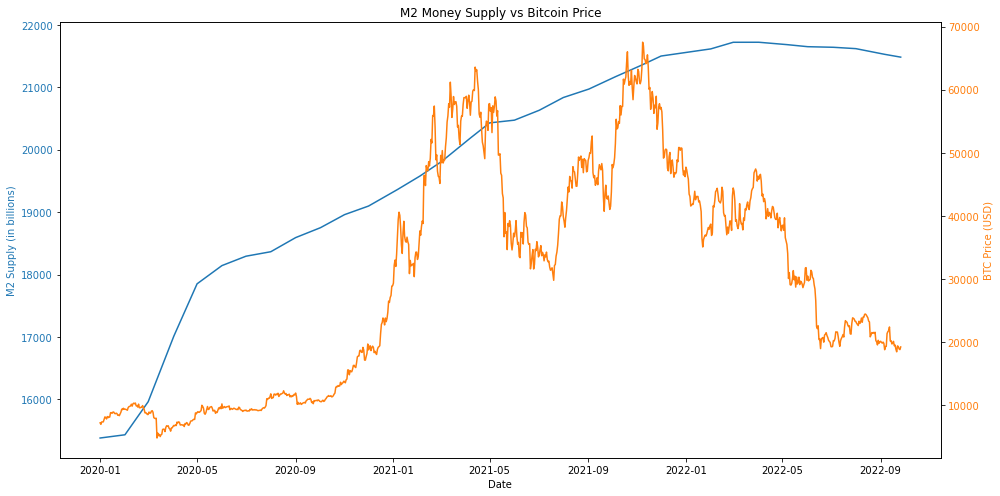

In [10]:

fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot M2 on the primary y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('M2 Supply (in billions)', color='tab:blue')
ax1.plot(merged_df.index, merged_df['M2'], color='tab:blue', label='M2 Supply')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis for the BTC price
ax2 = ax1.twinx()
ax2.set_ylabel('BTC Price (USD)', color='tab:orange')
ax2.plot(merged_df.index, merged_df['BTC Price'], color='tab:orange', label='BTC Price')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Title and legends
plt.title('M2 Money Supply vs Bitcoin Price')
fig.tight_layout()
plt.show()

